# Solução do Problema

### Como evoluiu o número de acidentes ao longo dos anos (2017–2023)?

In [0]:
%sql
SELECT
  t.ano,
  COUNT(*) AS total_acidentes
FROM delta.`/Volumes/workspace/default/gold_fato_acidente` f
JOIN delta.`/Volumes/workspace/default/gold_dim_tempo` t
  ON f.id_tempo = t.id_tempo
GROUP BY t.ano
ORDER BY t.ano;


ano,total_acidentes
2017,89567
2018,69332
2019,67556
2020,63576
2021,64539
2022,64547
2023,44035


In [0]:
df_acidentes_ano = spark.sql("""
SELECT
  t.ano,
  COUNT(*) AS total_acidentes
FROM delta.`/Volumes/workspace/default/gold_fato_acidente` f
JOIN delta.`/Volumes/workspace/default/gold_dim_tempo` t
  ON f.id_tempo = t.id_tempo
GROUP BY t.ano
ORDER BY t.ano;

""").toPandas()

df_acidentes_ano

,ano,total_acidentes
0,2017,89567
1,2018,69332
2,2019,67556
3,2020,63576
4,2021,64539
5,2022,64547
6,2023,44035


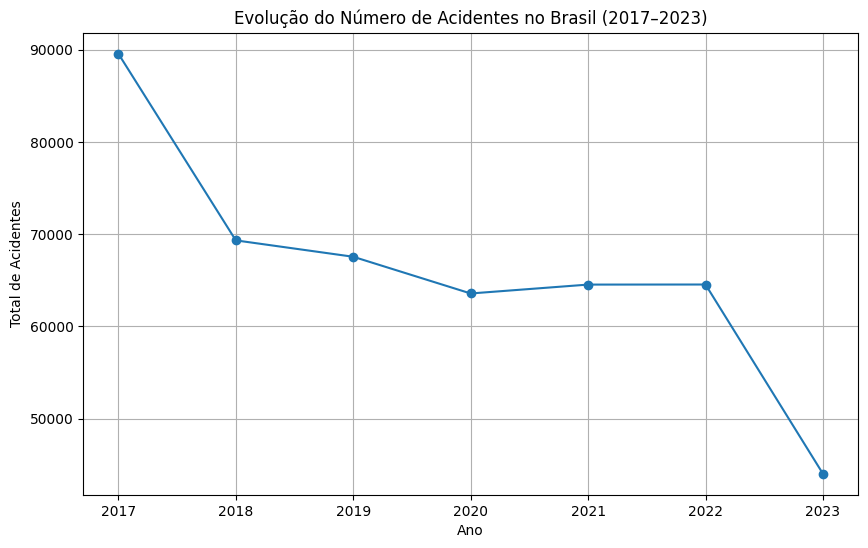

In [0]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(
    df_acidentes_ano["ano"],
    df_acidentes_ano["total_acidentes"],
    marker="o"
)

plt.title("Evolução do Número de Acidentes no Brasil (2017–2023)")
plt.xlabel("Ano")
plt.ylabel("Total de Acidentes")
plt.grid(True)

plt.show()

A análise da série histórica de acidentes de trânsito no Brasil entre 2017 e 2023 evidencia uma tendência geral de queda no número de ocorrências, com alguns pontos de inflexão relevantes ao longo do período.

Em 2017, observa-se o maior volume de acidentes da série, com aproximadamente 89,5 mil registros. A partir de 2018, há uma redução acentuada, que se mantém de forma relativamente consistente até 2020, ano em que o total cai para cerca de 63,6 mil acidentes. Essa queda acumulada pode estar associada a uma combinação de fatores, como mudanças regulatórias, avanços em fiscalização, melhorias na infraestrutura viária e, especialmente em 2020, os efeitos das restrições de mobilidade decorrentes da pandemia da COVID-19.

Nos anos de 2021 e 2022, o volume de acidentes apresenta leve estabilidade, com valores próximos a 64,5 mil registros, indicando uma possível retomada gradual da circulação de veículos sem, contudo, retornar aos patamares observados antes de 2018. Esse comportamento sugere que, mesmo com o aumento da mobilidade pós-pandemia, o número de acidentes não voltou aos níveis historicamente mais altos do início da série.

Em 2023, observa-se uma queda expressiva, com aproximadamente 44 mil acidentes, o menor valor de toda a série analisada. Esse resultado pode indicar tanto uma consolidação de tendências estruturais de redução de acidentes quanto possíveis impactos de subnotificação ou mudanças no processo de coleta e disponibilização dos dados, o que merece atenção em análises futuras.

De forma geral, os resultados indicam uma redução significativa e consistente dos acidentes de trânsito ao longo do período, reforçando a importância de análises complementares por região, tipo de acidente e gravidade para melhor compreender os fatores associados a essa evolução.

### Quais estados e municípios concentram mais acidentes?

In [0]:
%sql
SELECT
  l.uf,
  COUNT(*) AS total_acidentes
FROM delta.`/Volumes/workspace/default/gold_fato_acidente` f
JOIN delta.`/Volumes/workspace/default/gold_dim_localizacao` l
  ON f.id_localizacao = l.id_localizacao
GROUP BY l.uf
ORDER BY total_acidentes DESC

uf,total_acidentes
MG,7550
SC,7303
PR,6578
RJ,4055
RS,4001
SP,3768
BA,3025
GO,2805
ES,2455
PE,2255


In [0]:
%sql
SELECT
  l.uf,
  l.municipio,
  COUNT(*) AS total_acidentes
FROM delta.`/Volumes/workspace/default/gold_fato_acidente` f
JOIN delta.`/Volumes/workspace/default/gold_dim_localizacao` l
  ON f.id_localizacao = l.id_localizacao
GROUP BY l.uf, l.municipio
ORDER BY total_acidentes DESC
limit 20

uf,municipio,total_acidentes
PR,CURITIBA,923
SC,PALHOCA,770
DF,BRASILIA,768
SP,GUARULHOS,684
ES,SERRA,660
SC,SAO JOSE,641
RO,PORTO VELHO,450
RJ,DUQUE DE CAXIAS,434
PB,JOAO PESSOA,396
MG,BETIM,393


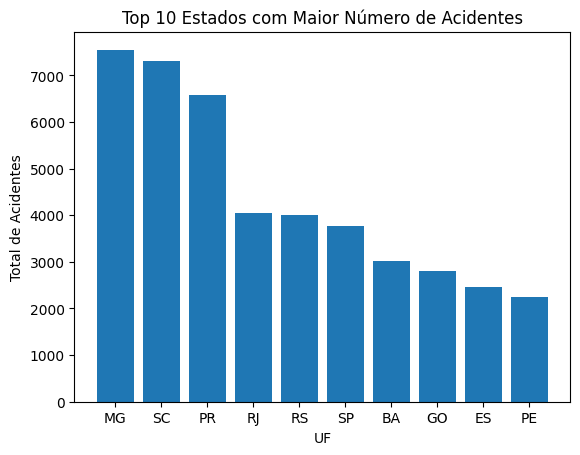

In [0]:
import matplotlib.pyplot as plt

df_uf = spark.sql("""
SELECT
  l.uf,
  COUNT(*) AS total_acidentes
FROM delta.`/Volumes/workspace/default/gold_fato_acidente` f
JOIN delta.`/Volumes/workspace/default/gold_dim_localizacao` l
  ON f.id_localizacao = l.id_localizacao
GROUP BY l.uf
ORDER BY total_acidentes DESC
LIMIT 10
""").toPandas()

plt.figure()
plt.bar(df_uf["uf"], df_uf["total_acidentes"])
plt.title("Top 10 Estados com Maior Número de Acidentes")
plt.xlabel("UF")
plt.ylabel("Total de Acidentes")
plt.show()

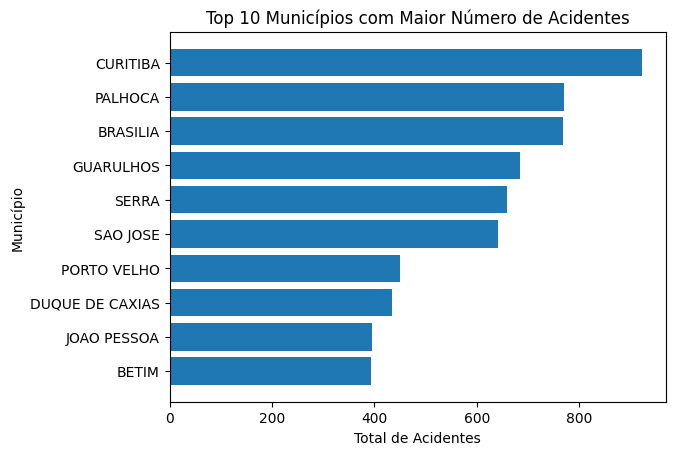

In [0]:
df_municipio = spark.sql("""
SELECT
  l.municipio,
  COUNT(*) AS total_acidentes
FROM delta.`/Volumes/workspace/default/gold_fato_acidente` f
JOIN delta.`/Volumes/workspace/default/gold_dim_localizacao` l
  ON f.id_localizacao = l.id_localizacao
GROUP BY l.municipio
ORDER BY total_acidentes DESC
LIMIT 10
""").toPandas()

plt.figure()
plt.barh(df_municipio["municipio"], df_municipio["total_acidentes"])
plt.title("Top 10 Municípios com Maior Número de Acidentes")
plt.xlabel("Total de Acidentes")
plt.ylabel("Município")
plt.gca().invert_yaxis()
plt.show()

Os estados com maior número de acidentes no período analisado foram Minas Gerais, Santa Catarina e Paraná, seguidos por Rio de Janeiro, Rio Grande do Sul e São Paulo. Esse resultado pode ser associado a fatores como:

- extensa malha rodoviária;

- elevado fluxo de veículos;

- presença de grandes centros urbanos e regiões metropolitanas;

- corredores logísticos e rodovias federais de alto tráfego.

Destaca-se que estados do Sul e Sudeste dominam o ranking, o que é coerente com sua maior densidade populacional, nível de urbanização e intensidade das atividades econômicas.

No nível municipal, observa-se uma concentração ainda mais evidente. Curitiba (PR) aparece como o município com maior número de acidentes, seguida por Palhoça (SC) e Brasília (DF). Outros municípios relevantes incluem Guarulhos (SP), Serra (ES), São José (SC) e Duque de Caxias (RJ).

Esse padrão sugere que:

- áreas metropolitanas e capitais concentram mais ocorrências;

- municípios localizados em regiões de entroncamentos rodoviários ou áreas industriais apresentam maior risco;

- cidades com grande fluxo pendular (trabalho, logística, turismo) tendem a registrar mais acidentes.


A concentração espacial dos acidentes indica que políticas públicas de prevenção e fiscalização podem ser mais eficazes quando direcionadas a estados e municípios específicos, sobretudo em regiões metropolitanas e corredores de transporte. Esses resultados reforçam a importância de análises geográficas para apoiar ações de segurança viária baseadas em evidências.

### Existem padrões temporais (mês e dia da semana) associados a maior incidência?

In [0]:
%sql
SELECT
  t.mes,
  COUNT(*) AS total_acidentes
FROM delta.`/Volumes/workspace/default/gold_fato_acidente` f
JOIN delta.`/Volumes/workspace/default/gold_dim_tempo` t
  ON f.id_tempo = t.id_tempo
GROUP BY t.mes
ORDER BY t.mes;

mes,total_acidentes
1,40759
2,38301
3,40081
4,38405
5,39324
6,39558
7,41099
8,40657
9,35119
10,36402


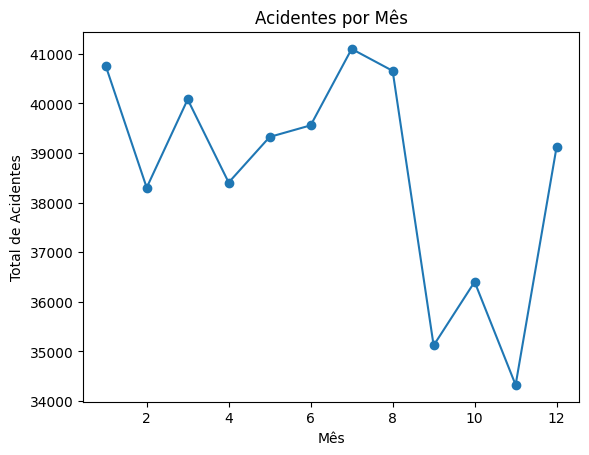

In [0]:
import matplotlib.pyplot as plt

df_mes = spark.sql("""
SELECT t.mes, COUNT(*) AS total_acidentes
FROM delta.`/Volumes/workspace/default/gold_fato_acidente` f
JOIN delta.`/Volumes/workspace/default/gold_dim_tempo` t
  ON f.id_tempo = t.id_tempo
GROUP BY t.mes
ORDER BY t.mes
""").toPandas()

plt.figure()
plt.plot(df_mes["mes"], df_mes["total_acidentes"], marker="o")
plt.title("Acidentes por Mês")
plt.xlabel("Mês")
plt.ylabel("Total de Acidentes")
plt.show()


In [0]:
%sql
SELECT
  t.dia_semana,
  COUNT(*) AS total_acidentes
FROM delta.`/Volumes/workspace/default/gold_fato_acidente` f
JOIN delta.`/Volumes/workspace/default/gold_dim_tempo` t
  ON f.id_tempo = t.id_tempo
GROUP BY t.dia_semana
ORDER BY total_acidentes DESC;

dia_semana,total_acidentes
sábado,77133
domingo,76960
sexta-feira,71435
segunda-feira,62816
quinta-feira,60329
quarta-feira,57878
terça-feira,56601


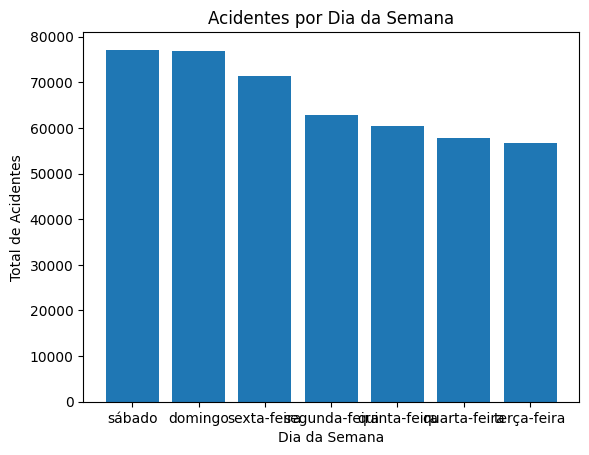

In [0]:
df_dia = spark.sql("""
SELECT t.dia_semana, COUNT(*) AS total_acidentes
FROM delta.`/Volumes/workspace/default/gold_fato_acidente` f
JOIN delta.`/Volumes/workspace/default/gold_dim_tempo` t
  ON f.id_tempo = t.id_tempo
GROUP BY t.dia_semana
ORDER BY total_acidentes DESC
""").toPandas()

plt.figure()
plt.bar(df_dia["dia_semana"], df_dia["total_acidentes"])
plt.title("Acidentes por Dia da Semana")
plt.xlabel("Dia da Semana")
plt.ylabel("Total de Acidentes")
plt.show()

A análise dos acidentes ao longo dos meses do ano indica uma sazonalidade moderada. Observa-se maior incidência entre janeiro, março, julho e agosto, com destaque para julho, que apresenta o maior volume de registros. Esses períodos coincidem com férias escolares e aumento do fluxo rodoviário, especialmente em viagens de média e longa distância. Em contrapartida, os menores volumes ocorrem entre setembro, outubro e novembro, sugerindo redução da mobilidade ou maior regularidade no tráfego nesses meses.

Quando analisados os dias da semana, o padrão é bastante claro. Os finais de semana concentram o maior número de acidentes, com sábado apresentando o maior volume, seguido de domingo. Entre os dias úteis, a sexta-feira se destaca com incidência superior aos demais, possivelmente associada ao aumento de deslocamentos intermunicipais e viagens iniciadas ao fim do expediente. Já terça-feira e quarta-feira apresentam os menores volumes, caracterizando períodos de tráfego mais previsível e rotineiro.

Em conjunto, os resultados evidenciam que fatores temporais estão fortemente associados à incidência de acidentes, reforçando a importância de políticas preventivas e ações de fiscalização reforçadas em finais de semana, feriados e meses de maior mobilidade.

### Como se distribuem os acidentes por tipo e por gravidade?

In [0]:
%sql
SELECT
  d.tipo_acidente,
  COUNT(*) AS total_acidentes
FROM delta.`/Volumes/workspace/default/gold_fato_acidente` f
JOIN delta.`/Volumes/workspace/default/gold_dim_acidente` d
  ON f.id_caracteristica = d.id_caracteristica
GROUP BY d.tipo_acidente
ORDER BY total_acidentes DESC

tipo_acidente,total_acidentes
Colisão traseira,20712
Saída de leito carroçável,14371
Colisão transversal,11820
Tombamento,7613
Colisão lateral,6543
Colisão frontal,6069
Colisão com objeto estático,4584
Queda de ocupante de veículo,4503
Atropelamento de Pedestre,4192
Capotamento,3864


In [0]:
%sql
SELECT
  d.classificacao_acidente AS gravidade,
  COUNT(*) AS total_acidentes
FROM delta.`/Volumes/workspace/default/gold_fato_acidente` f
JOIN delta.`/Volumes/workspace/default/gold_dim_acidente` d
  ON f.id_caracteristica = d.id_caracteristica
GROUP BY d.classificacao_acidente
ORDER BY total_acidentes DESC


gravidade,total_acidentes
Com Vítimas Feridas,70207
Sem Vítimas,19702
Com Vítimas Fatais,6151


In [0]:
import matplotlib.pyplot as plt

df_tipo_gravidade = spark.sql("""
SELECT
  d.tipo_acidente,
  d.classificacao_acidente AS gravidade,
  COUNT(*) AS total_acidentes
FROM delta.`/Volumes/workspace/default/gold_fato_acidente` f
JOIN delta.`/Volumes/workspace/default/gold_dim_acidente` d
  ON f.id_caracteristica = d.id_caracteristica
GROUP BY
  d.tipo_acidente,
  d.classificacao_acidente
""").toPandas()

In [0]:
df_pivot = (
    df_tipo_gravidade
    .pivot_table(
        index="tipo_acidente",
        columns="gravidade",
        values="total_acidentes",
        fill_value=0
    )
)
df_pivot["total"] = df_pivot.sum(axis=1)
df_pivot = df_pivot.sort_values("total", ascending=False).head(10)
df_pivot = df_pivot.drop(columns="total")

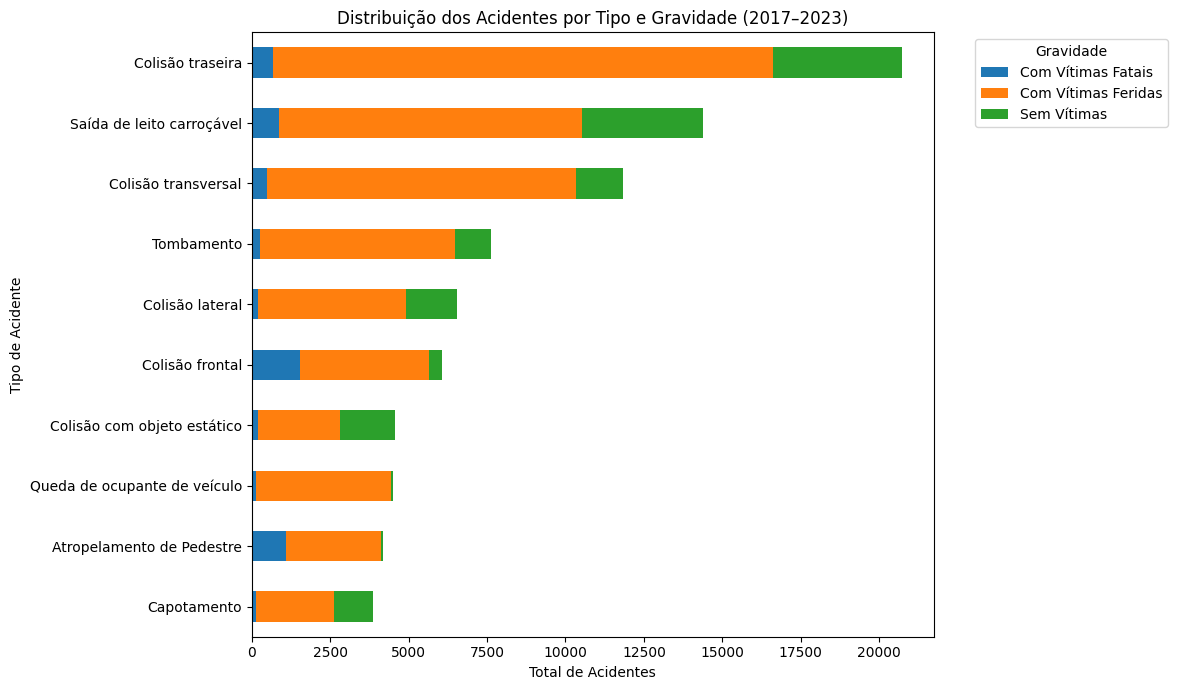

In [0]:
df_pivot.plot(
    kind="barh",
    stacked=True,
    figsize=(12,7)
)

plt.xlabel("Total de Acidentes")
plt.ylabel("Tipo de Acidente")
plt.title("Distribuição dos Acidentes por Tipo e Gravidade (2017–2023)")
plt.legend(title="Gravidade", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [0]:
%sql
SELECT
  d.tipo_acidente,
  d.classificacao_acidente AS gravidade,
  COUNT(*) AS total_acidentes
FROM delta.`/Volumes/workspace/default/gold_fato_acidente` f
JOIN delta.`/Volumes/workspace/default/gold_dim_acidente` d
  ON f.id_caracteristica = d.id_caracteristica
where d.classificacao_acidente = 'Com Vítimas Fatais'

GROUP BY
  d.tipo_acidente,
  d.classificacao_acidente

ORDER BY total_acidentes DESC



tipo_acidente,gravidade,total_acidentes
Colisão frontal,Com Vítimas Fatais,1529
Atropelamento de Pedestre,Com Vítimas Fatais,1109
Saída de leito carroçável,Com Vítimas Fatais,873
Colisão traseira,Com Vítimas Fatais,677
Colisão transversal,Com Vítimas Fatais,490
Tombamento,Com Vítimas Fatais,254
Colisão com objeto estático,Com Vítimas Fatais,200
Atropelamento de Animal,Com Vítimas Fatais,193
Colisão lateral,Com Vítimas Fatais,189
Capotamento,Com Vítimas Fatais,141


A análise da distribuição dos acidentes por tipo e gravidade mostra que os eventos mais frequentes no período entre 2017 e 2023 não são necessariamente os mais letais. As colisões traseiras aparecem como o tipo de acidente mais comum em todo o período, concentrando o maior volume de ocorrências. Esse padrão é consistente com cenários de tráfego intenso, especialmente em rodovias e vias urbanas de grande fluxo, onde falhas de atenção, distância inadequada entre veículos e frenagens bruscas são mais recorrentes. Apesar da alta frequência, a maior parte dessas colisões resulta em vítimas feridas, com uma proporção relativamente menor de acidentes fatais.

Em seguida, destacam-se a saída de leito carroçável e a colisão transversal, que também apresentam grande volume de ocorrências e predominância de vítimas feridas. Esses tipos de acidentes tendem a estar associados à perda de controle do veículo, erros de manobra e condições da via, o que aumenta a gravidade dos impactos, embora nem sempre resulte em óbitos. Tombamentos e colisões laterais aparecem em patamares intermediários de frequência, mantendo o mesmo padrão geral de maior concentração de vítimas feridas e menor proporção de acidentes sem vítimas.

Quando a análise é direcionada especificamente para a gravidade dos acidentes, observa-se um comportamento distinto. Os acidentes com vítimas fatais concentram-se de forma mais expressiva em tipos menos frequentes, mas intrinsecamente mais severos. A colisão frontal é o principal exemplo desse fenômeno, sendo o tipo de acidente com maior número absoluto de mortes no período analisado. Esse resultado é coerente com a natureza desse tipo de impacto, que envolve altas velocidades relativas e grande liberação de energia, reduzindo significativamente as chances de sobrevivência, mesmo com o uso de dispositivos de segurança.

Outro destaque relevante é o atropelamento de pedestres, que figura entre os tipos com maior número de vítimas fatais, apesar de não estar entre os mais frequentes. Isso evidencia a elevada vulnerabilidade dos pedestres no sistema viário, especialmente em ambientes urbanos, onde a interação entre veículos e pessoas ocorre de forma mais intensa. Saídas de leito carroçável e colisões traseiras também aparecem entre os tipos com registros de óbitos, embora com menor intensidade quando comparados às colisões frontais e aos atropelamentos.

De forma geral, os resultados indicam que os acidentes mais comuns tendem a gerar principalmente ferimentos, enquanto os acidentes fatais estão fortemente associados a tipos específicos de ocorrência, caracterizados por maior severidade estrutural do impacto ou pela exposição direta de usuários vulneráveis. Esse padrão reforça a importância de políticas públicas e intervenções focadas não apenas na redução do número total de acidentes, mas especialmente na mitigação dos tipos de eventos com maior potencial letal, como colisões frontais e atropelamentos.